In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix



In [2]:
# Data set
x = np.array([[1,3],[1.1,4.5],
    [1.5,4],[1.7,5],[3,1],
    [3.5,1.1],[3.4,2.1]])



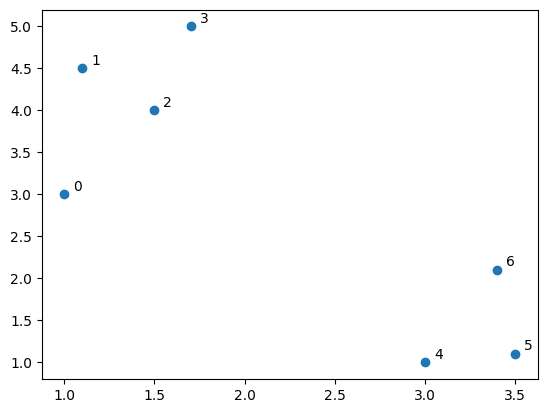

In [3]:
# Visualisation
plt.scatter(x[:,0],x[:,1])
for i in range(x.shape[0]):
    plt.text(x[i,0]+0.05, x[i,1]+0.05, str(i))



In [4]:
# Distance matrix
dm = distance_matrix(x,x)
print(np.round(dm,2))

[[0.   1.5  1.12 2.12 2.83 3.14 2.56]
 [1.5  0.   0.64 0.78 3.98 4.16 3.32]
 [1.12 0.64 0.   1.02 3.35 3.52 2.69]
 [2.12 0.78 1.02 0.   4.21 4.3  3.36]
 [2.83 3.98 3.35 4.21 0.   0.51 1.17]
 [3.14 4.16 3.52 4.3  0.51 0.   1.  ]
 [2.56 3.32 2.69 3.36 1.17 1.   0.  ]]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [6]:

x = np.array([[1,3],[1.1,4.5],
    [1.5,4],[1.7,5],[3,1],
    [3.5,1.1],[3.4,2.1]])


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [12.5, 12.5, 43.75, 43.75]],
 'dcoord': [[0.0, 0.5099019513592785, 0.5099019513592785, 0.0],
  [0.0, 1.004987562112089, 1.004987562112089, 0.5099019513592785],
  [0.0, 0.6403124237432848, 0.6403124237432848, 0.0],
  [0.0, 0.7810249675906653, 0.7810249675906653, 0.6403124237432848],
  [0.0, 1.118033988749895, 1.118033988749895, 0.7810249675906653],
  [1.004987562112089,
   2.563201123595259,
   2.563201123595259,
   1.118033988749895]],
 'ivl': [6, 4, 5, 0, 3, 1, 2],
 'leaves': [6, 4, 5, 0, 3, 1, 2],
 'color_list': ['C1', 'C1', 'C2', 'C2', 'C2', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C2']}

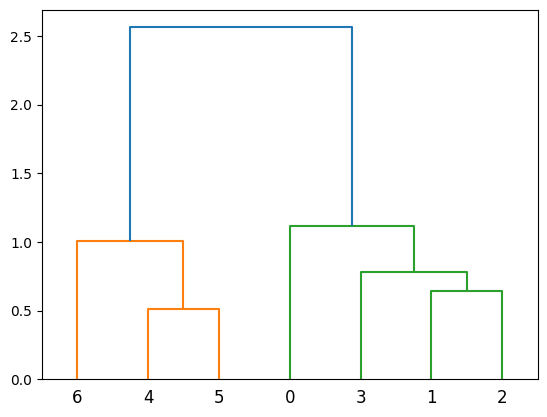

In [7]:




plt.figure()
dendrogram(linkage(x,'single'), labels=range(0,7))

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

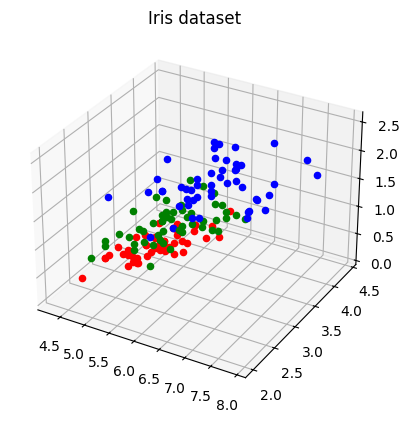

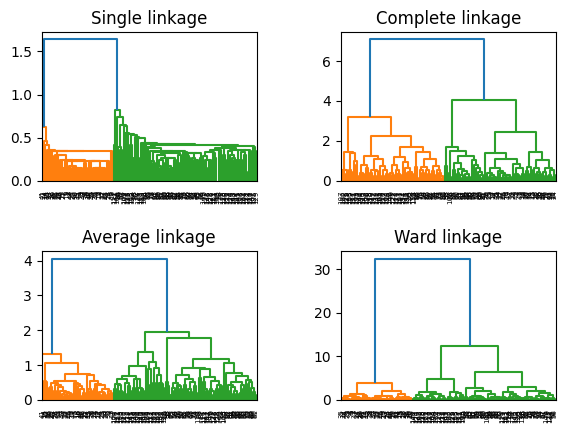

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #in order to do 3d plots
from sklearn import datasets

# Load the iris dataset
irisdata = datasets.load_iris()

# Get the iris data
x = irisdata.data
x_labs = irisdata.target
labels = np.unique(x_labs) #get unique labels

# Visualize in 3D
d = [0,1,3] #which dimensions to use

fig = plt.figure()
ax = plt.axes(projection ="3d")
ax.set_title('Iris dataset')

for i, j in enumerate(x_labs):
    if j==labels[0]:
        ax.scatter3D(x[i,d[0]],x[i,d[1]],x[i,d[2]], marker='o', color='red')
    elif j==labels[1]:
        ax.scatter3D(x[i,d[0]],x[i,d[1]],x[i,d[2]], marker='o', color='green')
    else:
        ax.scatter3D(x[i,d[0]],x[i,d[1]],x[i,d[2]], marker='o', color='blue')   


#-----------------------------------------------------------------------


# Generate the dendrogram (4 linkage methods)
from scipy.cluster.hierarchy import dendrogram, linkage

fig, axes = plt.subplots(2,2)
fig.tight_layout(pad=3.0)

dendrogram(linkage(x,'single'), ax=axes[0,0])
axes[0,0].set_title('Single linkage')

dendrogram(linkage(x,'complete'), ax=axes[0,1])
axes[0,1].set_title('Complete linkage')

dendrogram(linkage(x,'average'), ax=axes[1,0])
axes[1,0].set_title('Average linkage')

dendrogram(linkage(x,'ward'), ax=axes[1,1])
axes[1,1].set_title('Ward linkage')


#-----------------------------------------------------------------------


# Agglomerative clustering (4 linkage methods)
from sklearn.cluster import AgglomerativeClustering

k = 3
metric = 'euclidean'
linkage_criteria = ['single','complete','average','ward']
clustering_result = []

for i in linkage_criteria:
    myCluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage=i)
    clustering_result.append(myCluster.fit_predict(x))
    
    
# Visualize
fig = plt.figure()
fig.tight_layout(pad=3.0)
i_plt = 1    #subplot index
d = [0,1,2]  #which dimensions to use

for links in clustering_result:
    ax = fig.add_subplot(2, 2, i_plt, projection='3d')
    ax.set_title(linkage_criteria[i_plt-1])
    
    for i, j in enumerate(links):
        if j==labels[0]:
            ax.scatter3D(x[i,d[0]],x[i,d[1]],x[i,d[2]], marker='o', color='red')
        elif j==labels[1]:
            ax.scatter3D(x[i,d[0]],x[i,d[1]],x[i,d[2]], marker='o', color='green')
        else:
            ax.scatter3D(x[i,d[0]],x[i,d[1]],x[i,d[2]], marker='o', color='blue')   
        
    i_plt +=1